In [2]:
gc = gcSampler.gcSampler(100.,\
                fractions=np.array([0.25,0.25,0.5]),center=[2000.,2000.],spatial=np.array([5.0e5,0.7,0.0]),\
                  max_rad=2000.,radial_profile='exponential',mock=True,n_source=1000,ellipticity=True,\
                         n_pop=2,fixed_cov=False,lum_function='mag_only',completeness='mag_only',fg_faint=26.,
                         fg_bright=19.,lum_mean=np.array([22.]),lum_sig=np.array([1.4]))

In [3]:
completeness_obj = pickle.load(open('fake_gal_completeness.p','rb'))

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
#import fakeGalaxy
#reload(fakeGalaxy)
import numpy as np
#import seWrapper
import gcSampler
import densityGC
import densityFG
import subprocess as sp
import SourceCompleteness
import corner
import pickle
import seaborn as sea
#reload(seWrapper)
reload(gcSampler)
reload(densityGC)
reload(densityFG)
reload(SourceCompleteness)

<module 'SourceCompleteness' from 'SourceCompleteness.pyc'>

In [4]:
norm = SourceCompleteness.CompleteNormalization(gc.gc,gc.fg,\
                                                [completeness_obj,completeness_obj,completeness_obj],filters=3)

In [5]:
norm.calc_fg_norm()

0.52775453440897979

In [53]:
norm.calc_gc_norm(means=np.array([[1.03,0.30],[0.75,0.19]]),covs=np.array([[[0.009, 0.0042],[0.0042, 0.0027]],\
[[0.0082, 0.0031],[0.0031,.0018]]]),lum_means=np.array([23.]),lum_sigs=np.array([1.4]),fractions=np.array([0.25,0.25]))

0.0773728452775 0.425965305065


0.032958147642378449

In [61]:
print np.sum(norm.lum_like * 0.005)
print norm.gc_density.fixed_lum

0.092828856029
False


In [293]:
print norm.c1.size
xx,yy = np.meshgrid(norm.c1,norm.c2)
inds_1,inds_2 = np.meshgrid(np.linspace(0,norm.c1.size-1,norm.c1.size),np.linspace(0,norm.c2.size-1,norm.c2.size))
norm.large_complete[0].shape

150


(2, 8000)

In [7]:
complete_array = norm.make_complete_grid(completeness_obj)

In [8]:
norm_val= norm.marginalize_color_complete(complete_array,complete_array,color=np.linspace(-1.5,1.5,25),\
                                         faint_mag=26.,bright_mag=22.)
print norm_val

[[-1.5         0.24535601]
 [-1.375       0.27573918]
 [-1.25        0.30608005]
 [-1.125       0.33621222]
 [-1.          0.365962  ]
 [-0.875       0.39512956]
 [-0.75        0.42347596]
 [-0.625       0.45071804]
 [-0.5         0.47653272]
 [-0.375       0.50057502]
 [-0.25        0.52250891]
 [-0.125       0.54204836]
 [ 0.          0.55900029]
 [ 0.125       0.57329634]
 [ 0.25        0.58500365]
 [ 0.375       0.59431453]
 [ 0.5         0.60151374]
 [ 0.625       0.60693528]
 [ 0.75        0.61092072]
 [ 0.875       0.61378757]
 [ 1.          0.61580974]
 [ 1.125       0.61721089]
 [ 1.25        0.61816548]
 [ 1.375       0.61880509]
 [ 1.5         0.61922622]]


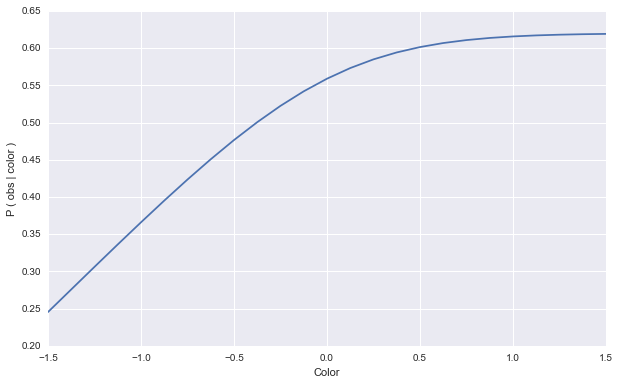

In [15]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(norm_val[:,0],norm_val[:,1])
ax.set_xlabel('Color')
ax.set_ylabel('P ( obs | color )')

In [317]:
foo = np.arange(10)
foo_2 = np.arange(10,20)

print np.stack([foo,foo_2],axis=1).shape

(10, 2)
